<a href="https://colab.research.google.com/github/Abhedya19/Internship-The-Sparks-Foundation/blob/main/Hour_based_Percentage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abhedya Mishra**


**Data Science and Business Analytics Intern @ The Sparks Foundation**




**GRIP Task 1:**

**Predicting the percentage of a child based on their number of study hours using the Linear Regression Model.**

**About Linear Regression**

Linear regression is a linear model, i.e a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, it assumes that y can be calculated from a linear combination of the input variables (x).

When there is a single input variable (x), the method is referred to as **Simple Linear Regression**. When there are multiple input variables, literature from statistics often refers to the method as **Multiple Linear Regression**.

**Step 1:**

Importing all required libraries and then uploading, reading, and displaying the data.

In [16]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Graphical representation of data and model fitting
import seaborn as sns #Graphical representation of data and model fitting

In [17]:
#uploading the data into a dataframe
study_hours=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(study_hours)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


**Step 2:**

Performing Eploratory Data Analysis on the DataFrame

In [18]:
#description of the DataFrame
study_hours.info()   #displaying number of rows and columns,name and datatype of each column 
                     #and total memory space occupied by dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can see that there are a total of two columns and 25 entries in the Dataset.

In [19]:
#statistical analysis of each column
study_hours.describe() #mean,standard deviation,interquartile range and range of values in each column

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
#checking for null values
study_hours.isnull().sum() 

Hours     0
Scores    0
dtype: int64

In [21]:
#checking for negative values
y=(study_hours<0).all(1)
print(y)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool


We can see that there neither any null values nor any negative values in the dataset.

**Step 3:**

Data Visualisation

In [22]:
#assigning values to the target variable y and input feature x
X=study_hours.iloc[:,:-1]
Y=study_hours.iloc[:,-1]

In [23]:
#splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

Text(0, 0.5, 'Score')

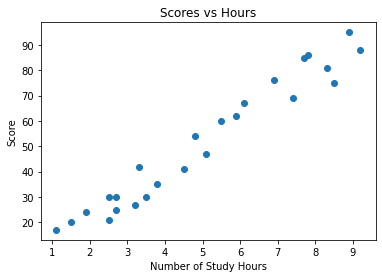

In [24]:
#studying the relation using scatter plot
plt.scatter(X,Y)
plt.title("Scores vs Hours")
plt.xlabel("Number of Study Hours")
plt.ylabel("Score")

**Step 4:**

Fitting the linear regression model on the Dataset

In [25]:
#training the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#making predictions
Y_pred=regressor.predict(X_test)
print(Y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


Text(0, 0.5, 'Score')

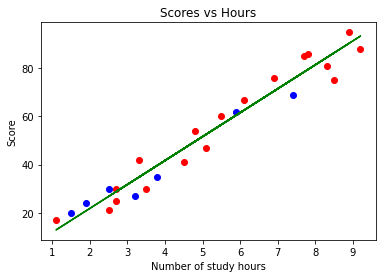

In [27]:
#visualising the fit of the model on the dataset
plt.scatter(X_train,Y_train,color="Red")
plt.scatter(X_test,Y_test,color="Blue")
plt.plot(X_train,regressor.predict(X_train),color="Green")
plt.title("Scores vs Hours")
plt.xlabel("Number of study hours")
plt.ylabel("Score")

**Step 5:**

Model Evaluation

In [28]:
from sklearn import metrics
r_sq=regressor.score(X,Y)
print("Coefficient of Determination:",r_sq)
print("intercept:",regressor.intercept_)
print("slope:",regressor.coef_)

Coefficient of Determination: 0.9525462098246908
intercept: 1.9322042531516601
slope: [9.94167834]


We can see that the value of Rsqure is 0.952, intercept is 1.932 and slope is 9.94

In [29]:
#errors
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(Y_test,Y_pred))


Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996


**Step 6:**

Submitting the required prediction

In [30]:
#score of a child studying for 9.25 hours a day
score=regressor.predict([[9.25]])
print(score)

[93.89272889]


As per my predictions, a student who studies for 9.25hrs/day would get a score of 93.89%